# Parsing FlockLab Link Quality Test Results

| **Author** |**Last modified**|
|:---:|:---:|
|Romain Jacob  |17-11-2019|

This notebook describes and performs the parsing of the raw data for the link quality tests run on FlockLab. Most of the code would be reusable for parsing results collected on other networks, but one would have to adapt some of the parsing to the specific serial log format.

The rationale about the collection of this dataset is described in the following abstract. 
> **Dataset: Wireless Link Quality Estimationon FlockLab – and Beyond**  
Romain Jacob, Reto Da Forno, Roman Trüb, Andreas Biri, Lothar Thiele   
DATA '19 Proceedings of the 2nd Workshop on Data Acquisition To Analysis, 2019  
[Direct link](https://www.research-collection.ethz.ch/handle/20.500.11850/355846)

The entire dataset is openly available on Zenodo. The repository contains the collected raw measurement data and other related files, including this notebook and the abstract.  
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3354717.svg)](https://doi.org/10.5281/zenodo.3354717)

The plots from the abstract can be found (in interactive version) in the notebook:
- [Figure 1](#Figure-1)
- [Figure 2a](#Figure-2a)
- [Figure 2b](#Figure-2b)

In [1]:
from flocklab_link_quality import *
%load_ext autoreload
%autoreload 2

In [2]:
# -----------------------------------------------------------------------------------------------------------------
# Parameter settings
# -----------------------------------------------------------------------------------------------------------------
# Targets to parse
targets = {'sky','dpp-cc430'}

# Month to preprocess
month = '2020-03'

# Path to results to parse
data_root_folder = Path("data_raw")

# Expected list of node ids
node_list = [1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]

# Number of strobes sent
number_of_strobes = 100

# Custom file name prefix (optional)
result_file_prefix = Path("data_preprocessed")
result_file_prefix = result_file_prefix / month 

# Create corresponding directory
if not os.path.exists(str(result_file_prefix)):
    os.mkdir(str(result_file_prefix))

result_file_prefix = result_file_prefix / str(month+'_')

# Enable/Disable verbose print information
verbose_print = False
# -----------------------------------------------------------------------------------------------------------------

In [3]:
# -----------------------------------------------------------------------------------------------------------------
# Preprocessing routine
# -----------------------------------------------------------------------------------------------------------------
process_flocklab_data(        
        month,
        targets,
        data_root_folder,
        result_file_prefix,
        node_list,
        number_of_strobes,
        verbose=verbose_print,)

sky	 Processing...
sky	 Done.
dpp-cc430	 Processing...
dpp-cc430	 Done.


The raw data is now parsed and available easily from the `.cvs` files. We wrote simple routines to extract and plot two information from the `.csv` files: a connectivity map for the FlockLab network, and the time series of average link quality.

## FlockLab connectivity map

From the pre-processed `.csv` files, it is easy to compute a connectivity matrix for the FlockLab network. 

The numerical values in our matrix are the **median number of strobes** received across all tests.  
Grey squares indicate that there is no data available for the corresponding `source <-> destination` pair.

### Figure 1

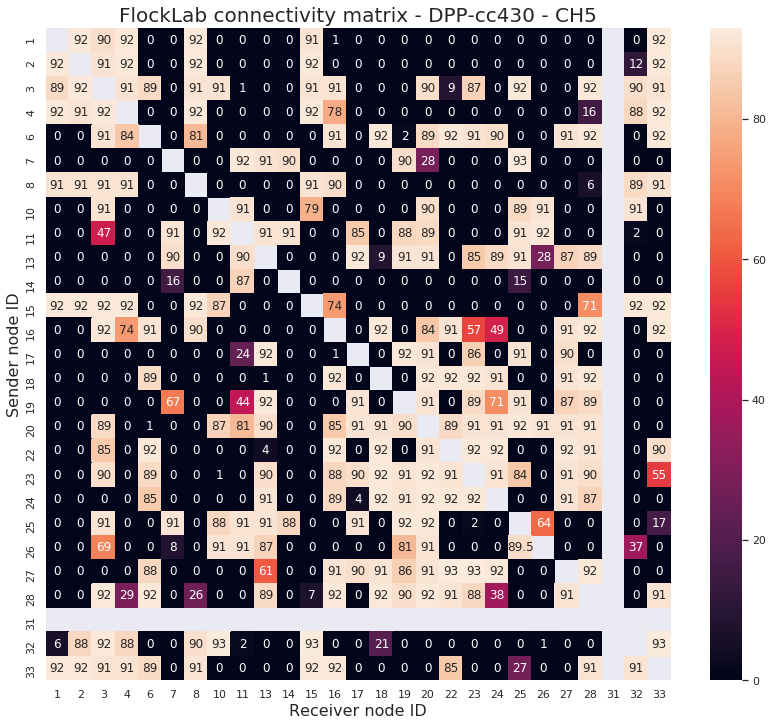

In [6]:
month = '2019-07'
result_file_prefix = Path("data_preprocessed")
result_file_prefix = result_file_prefix / month
data_file = result_file_prefix / str(month+'_FlockLab_dpp-cc430.csv')

# Set `abstract_plot` to True to generate the plot used in the abstract
# Set `abstract_plot` to False to generate the entire map
abstract_plot = False

if abstract_plot:
    sns.set(rc={'figure.figsize':(9,8)})
    plot_connectivity_matrix(str(data_file), node_list, plot_title=' ', slice_size=20)
else:
    sns.set(rc={'figure.figsize':(14,12)})
    plot_connectivity_matrix(str(data_file), node_list, plot_title='FlockLab connectivity matrix - DPP-cc430 - CH5')

> **Figure 1: (Partial) FlockLab connectivity matrix for theTelosB platform.** The matrix shows the median number of strobesreceived between each pair of nodes in tests run in July 2019. Forvisibility, we limit the visualization to node 1 to 20.

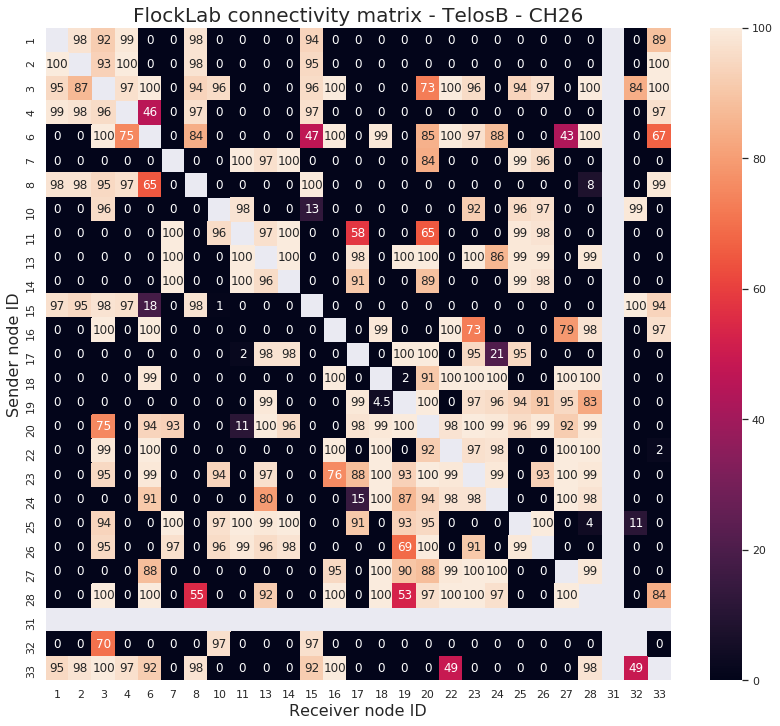

In [4]:
month = '2019-07'
result_file_prefix = Path("data_preprocessed")
result_file_prefix = result_file_prefix / month
data_file = result_file_prefix / str(month+'_FlockLab_sky.csv')

sns.set(rc={'figure.figsize':(14,12)})
plot_connectivity_matrix(
    str(data_file), 
    node_list,
    plot_title='FlockLab connectivity matrix - TelosB - CH26')

## Average link quality time series

From the pre-processed `.csv` files, it is also easy to plot a time series for some given metric.

As an example, we wrote a routine that plot a time series of **average link quality**.  
We define such an average by considering only links where the number of strobes received is above a given threshold (e.g., 50 - out of 100), then taking the mean of the number of strobes received between all `source <-> destination` pairs.

**Note.** This definition of average link quality is arbitrary, and only serves as illustration.

### Figure 2a

In [7]:
# Set `abstract_plot` to True to generate the plot used in the abstract
# Set `abstract_plot` to False to generate the entire map
abstract_plot = False

active_threshold = 50
months = ['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02']
# months = ['2019-09']
data_file_list = []
out_name = Path('plots')
out_name = str(out_name / 'FlockLab_TimeSeries_dpp-cc430.pdf')
for month in months:
    result_file_prefix = Path("data_preprocessed")
    result_file_prefix = result_file_prefix / month
    data_file = result_file_prefix / str(month+'_FlockLab_dpp-cc430.csv')
    data_file_list.append(str(data_file))

In [8]:
if abstract_plot:
    data_file_list = [data_file_list[0]] # Plot 2019-07 only
    plot_title=' '
    df = plot_link_quality_series(data_file_list, active_threshold, plot_title=plot_title, plot_size=[450,275], out_name=out_name)
else:
    plot_title = 'DPP-cc430 mote - FlockLab - CH5 - 0dBm'
    df = plot_link_quality_series(data_file_list, active_threshold, plot_title=plot_title, out_name=None)

> **Figure 2a: DPP-cc430.** Channel5(869 MHz), 8-bytes payload, 0dBm TX power.

### Figure 2b

In [11]:
# Set `abstract_plot` to True to generate the plot used in the abstract
# Set `abstract_plot` to False to generate the entire map
abstract_plot = False

active_threshold = 50
# months = ['2019-07', '2019-08', '2019-09']
months = ['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02']
data_file_list = []
out_name = Path('plots')
out_name = str(out_name / 'FlockLab_TimeSeries_sky.pdf')
for month in months:
    result_file_prefix = Path("data_preprocessed")
    result_file_prefix = result_file_prefix / month
    data_file = result_file_prefix / str(month+'_FlockLab_sky.csv')
    data_file_list.append(str(data_file))

if abstract_plot:
    data_file_list = [data_file_list[0]] # Plot 2019-07 only
    plot_title=' '
    df = plot_link_quality_series(data_file_list, active_threshold, plot_title=plot_title, plot_size=[450,275],out_name=out_name)
else:
    plot_title = 'Sky mote - FlockLab - CH26 - 0dBm'
    df = plot_link_quality_series(data_file_list, active_threshold, plot_title=plot_title, out_name=None)

> **Figure 2b: TelosB.** Channel26(2.48 GHz), 8-bytes payload, 0dBm TX power
